In [4]:
import sys; pip = "/".join(sys.executable.split("/")[:-1])+"/pip"
!$pip install --upgrade git+https://github.com/rramosp/rlxml
!$pip install --upgrade git+https://github.com/rramosp/rlxutils

  Cloning https://github.com/rramosp/rlxml to /tmp/pip-req-build-_ev50dg4
  Running command git clone -q https://github.com/rramosp/rlxml /tmp/pip-req-build-_ev50dg4
  Created wheel for rlxml: filename=rlxml-0.1.0-py3-none-any.whl size=18806 sha256=e2fa2b6e37161569240de13478b9791eb59742c6d1d20277b66c51aaa6622835
  Stored in directory: /tmp/pip-ephem-wheel-cache-mktv4_dq/wheels/fb/f5/9d/9e2d9eb3660e4a7b9b7dac84bfe42f0a28b0e180a252cd37ea
Successfully built rlxml
  Attempting uninstall: rlxml
    Found existing installation: rlxml 0.1.0
    Uninstalling rlxml-0.1.0:
      Successfully uninstalled rlxml-0.1.0
  Cloning https://github.com/rramosp/rlxutils to /tmp/pip-req-build-n5ji15ga
  Running command git clone -q https://github.com/rramosp/rlxutils /tmp/pip-req-build-n5ji15ga


  Created wheel for rlxutils: filename=rlxutils-0.0.1-py3-none-any.whl size=3331 sha256=7b847c40c167991191ab8239f579f0bba260da059f604faa43817be5573ea356
  Stored in directory: /tmp/pip-ephem-wheel-cache-cciidrw9/wheels/32/fc/45/0f0a86abc05fd23b44890963251daad9df596b8f69b603b65d
Successfully built rlxutils
  Attempting uninstall: rlxutils
    Found existing installation: rlxutils 0.0.1
    Uninstalling rlxutils-0.0.1:
      Successfully uninstalled rlxutils-0.0.1


In [ ]:
#!$pip install --upgrade git+file:///home/rlx/Dropbox/proyectos/rlxlibs/rlxml


In [5]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from rlxml import newphysics as phy
from importlib import reload
from joblib import delayed
import rlxutils
import pandas as pd
%matplotlib inline
reload(phy)

<module 'rlxml.newphysics' from '/opt/anaconda/envs/p38/lib/python3.8/site-packages/rlxml/newphysics.py'>

In [6]:
alpha=0.05
t, mu_s, sigma_s, real_mu = 0.01, 250, 10, 0.9
n_events = 11000 # number of events per experiment
n_experiments = 2000 # number of experiments (each one with n_events) for empirical distributions

n_bins=20
bin_edges = np.r_[list(np.linspace(0,950,n_bins))+[np.inf]]
bin_edges

array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.,
       550., 600., 650., 700., 750., 800., 850., 900., 950.,  inf])

In [7]:
mb = phy.SignalBg_BinnedModel(t=t, mu_s=mu_s, sigma_s=sigma_s, mu=real_mu, 
                              bin_edges=bin_edges, n_events=n_events)
h = mb.rvs()


In [8]:
h = mb.rvs()
h

array([2340, 1406,  835,  501, 2936, 2812,  121,   80,   49,   38,    9,
         15,    6,    8,    2,    3,    0,    0,    0,    0])

In [9]:
mb.log_prob(h)

-64.15913115265596

In [10]:
self = mb
smu = sy.symbols(r"\mu")
logL = sum([n*sy.log(smu*s*b+1e-100) - smu*s for n,s,b in zip(h, self.si, self.bi)])
logLd = logL.simplify().diff(smu).simplify()
logLd

(-7.53382895057467e-128*\mu**7 + 1.58355011204882e-127*\mu**6 + 3.80977897304772e-146*\mu**5 + 1.2062014535461e-202*\mu**4 + 3.20513257345395e-286*\mu**3 + 2.24515926857282e-385*\mu**2 + 2.24898334007605e-485*\mu + 3.72796980098314e-591)/(1.44603242813333e-131*\mu**7 + 4.42431654052691e-150*\mu**6 + 1.67411721519237e-206*\mu**5 + 5.03160529584607e-290*\mu**4 + 3.63313363904847e-389*\mu**3 + 3.91264135027659e-489*\mu**2 + 1.29031963627573e-594*\mu + 1.0e-700)

In [11]:
mb = phy.SignalBg_BinnedModel(t=t, mu_s=mu_s, sigma_s=sigma_s, mu=0.3, 
                              bin_edges=bin_edges, n_events=n_events)
h = mb.rvs()

In [12]:
self = mb
r_mu = np.linspace(.1,2, 100)
lp = [self.clone().set_mu(i).log_prob(h) for i in r_mu ]

In [13]:
import cProfile
import re
cProfile.run('[self.clone().set_mu(i).log_prob(h) for i in r_mu ]')

         2149029 function calls (2103429 primitive calls) in 1.482 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     8400    0.004    0.000    0.082    0.000 <__array_function__ internals>:2(any)
     7800    0.004    0.000    0.039    0.000 <__array_function__ internals>:2(atleast_1d)
      400    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(copyto)
     7800    0.004    0.000    0.125    0.000 <__array_function__ internals>:2(extract)
      400    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(ndim)
     7800    0.003    0.000    0.020    0.000 <__array_function__ internals>:2(nonzero)
    24600    0.011    0.000    0.075    0.000 <__array_function__ internals>:2(place)
    15600    0.007    0.000    0.050    0.000 <__array_function__ internals>:2(ravel)
     8400    0.005    0.000    0.016    0.000 <__array_function__ internals>:2(shape)
     2200    0.001    0.000    0.014    0

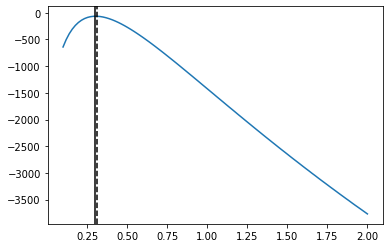

In [200]:
plt.plot(r_mu, lp)
plt.axvline(self.mu, color="black")
plt.axvline(r_mu[np.argmax(lp)], color="black", ls="--")

In [150]:
def flog(mu):
    k = self.clone().set_mu(mu)
    return (h*np.log(mu*k.si+k.bi)-(mu*k.si+k.bi)).sum()

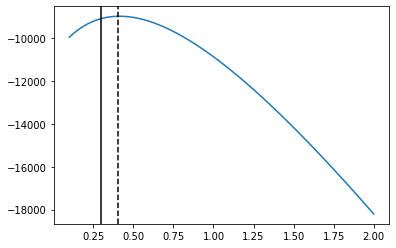

In [151]:
#f = lambda mu: sum([n*np.log(mu*s+b)-(mu*s+b) for n,s,b in zip(h, self.si, self.bi)])
#logL = sum([n*sy.log(smu*s*b+1e-100) - smu*s for n,s,b in zip(h, self.si, self.bi)])
lp = [flog(i) for i in r_mu ]
plt.plot(r_mu, lp)
plt.axvline(self.mu, color="black")
plt.axvline(r_mu[np.argmax(lp)], color="black", ls="--")
plt.show()

In [139]:
h = np.random.randint(3,size=h.shape)+1
h

array([2, 2, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 3, 1])

In [140]:
mu = 1
flog(mu)

-10859.288961133127

In [146]:
mu = 1
k = self.clone().set_mu(mu)
k.si = np.random.randint(3,size=h.shape)+1
k.bi = np.random.randint(3,size=h.shape)+1

np.log((((mu*k.si+k.bi)**h)*np.exp(-(mu*k.si+k.bi))).sum())

2.203044214559126

In [143]:
def f(mu):
    k = self.clone().set_mu(mu)
    return np.product([(mu*s+b)**n*np.exp(-(mu*s+b)) for n,s,b in zip(h, k.si, k.bi)])

In [148]:
print (np.log(np.product((((mu*k.si+k.bi)**h)*np.exp(-(mu*k.si+k.bi))))))
print ((h*np.log(mu*k.si+k.bi)-(mu*k.si+k.bi)).sum())

-27.001347190331284
-27.00134719033128


In [149]:
print (np.log(np.product(np.exp(-(mu*k.si+k.bi)))))
print ((-(mu*k.si+k.bi)).sum())

-80.0
-80


In [144]:
np.exp(-(mu*k.si+k.bi))

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.95320171e-210,
       0.00000000e+000, 0.00000000e+000, 1.61067861e-047, 4.15940802e-029,
       6.11043977e-018, 3.62430867e-011, 4.64889737e-007, 1.44229332e-004,
       4.68110348e-003, 3.86362335e-002, 1.38985346e-001, 3.02123446e-001,
       4.83855765e-001, 6.43829006e-001, 7.65620350e-001, 6.62532898e-001])

In [98]:
f(1)

<ipython-input-97-fa543ef13696>:3: RuntimeWarning: overflow encountered in double_scalars
  return np.product([(mu*s+b)**n*np.exp(-(mu*s+b)) for n,s,b in zip(h, k.si, k.bi)])
<ipython-input-97-fa543ef13696>:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.product([(mu*s+b)**n*np.exp(-(mu*s+b)) for n,s,b in zip(h, k.si, k.bi)])


nan

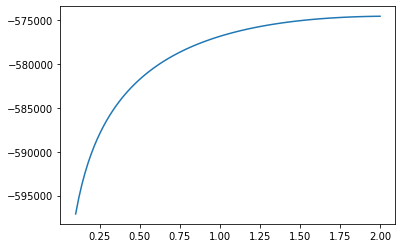

In [37]:
logL = sum([n*sy.log(smu*s*b+1e-100) - smu*s for n,s,b in zip(h, self.si, self.bi)])

f = sy.lambdify(smu, logL, "numpy" )
r = np.linspace(.1,2, 100)
plt.plot(r, f(r))
#plt.axhline(0, color="red")
plt.show()

In [24]:
f = sy.lambdify(smu, logLd, "numpy" )

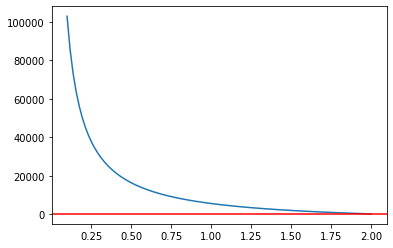

In [27]:
r = np.linspace(.1,2, 100)
plt.plot(r, f(r))
plt.axhline(0, color="red")

In [4]:
mu, s1, s2, b1, b2, n1, n2 = sy.symbols(r"\mu s_1 s_2 b_1 b_2 n_1 n_2")

In [8]:
logL = n1*sy.log(mu*s1+b1) -mu*s1 + n2*sy.log(mu*s2+b2) -mu*s2
logL

-\mu*s_1 - \mu*s_2 + n_1*log(\mu*s_1 + b_1) + n_2*log(\mu*s_2 + b_2)

In [9]:
logL.diff(mu)

n_1*s_1/(\mu*s_1 + b_1) + n_2*s_2/(\mu*s_2 + b_2) - s_1 - s_2

In [15]:
logL = sy.log( ((mu*s1+b1)**n1)*sy.exp(mu*s1+b1)*((mu*s2+b2)**n2)*sy.exp(mu*s2+b2))
logL

log((\mu*s_1 + b_1)**n_1*(\mu*s_2 + b_2)**n_2*exp(\mu*s_1 + b_1)*exp(\mu*s_2 + b_2))

In [17]:
logL.diff(mu).simplify()

(\mu**2*s_1**2*s_2 + \mu**2*s_1*s_2**2 + \mu*b_1*s_1*s_2 + \mu*b_1*s_2**2 + \mu*b_2*s_1**2 + \mu*b_2*s_1*s_2 + \mu*n_1*s_1*s_2 + \mu*n_2*s_1*s_2 + b_1*b_2*s_1 + b_1*b_2*s_2 + b_1*n_2*s_2 + b_2*n_1*s_1)/(\mu**2*s_1*s_2 + \mu*b_1*s_2 + \mu*b_2*s_1 + b_1*b_2)